.

Import libraries 

In [316]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [317]:
hotel= pd.read_csv('hotel_booking.csv')

In [318]:
hotel.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Jasmine Fletcher,JFletcher43@xfinity.com,190-271-6743,************9263
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,Transient,107.0,0,0,Check-Out,2015-07-03,Dylan Rangel,Rangel.Dylan@comcast.net,420-332-5209,************6994
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,Transient,103.0,0,1,Check-Out,2015-07-03,William Velez,Velez_William@mail.com,286-669-4333,************8729
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,Transient,82.0,0,1,Canceled,2015-05-06,Steven Murphy,Steven.Murphy54@aol.com,341-726-5787,************3639
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,Transient,105.5,0,0,Canceled,2015-04-22,Michael Moore,MichaelMoore81@outlook.com,316-648-6176,************9190


In [319]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [320]:
hotel.shape

(119390, 36)

In [321]:
hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


Cleaning the data 

1- Handling missing value 

In [322]:
# Columns having missing values
hotel.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Since the missing values in the "company" and the "agent" are high, we will delete them

In [323]:
hotel = hotel.drop(columns = ['agent', 'company'])

We will replace the null values under "children" column with mean value of children

In [324]:
hotel['children'].fillna(hotel['children'].mean(), inplace = True)

We will replace the missing value with the mode of 'country' column.

In [325]:
hotel['country'].fillna(hotel.country.mode().to_string(), inplace=True)

In [326]:
hotel.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

2-Removing duplicate rows if any

In [327]:
hotel[hotel.duplicated()].shape 

(0, 34)

There is no duplicate rows 

In [328]:
hotel[['children','adr']] = hotel[['children','adr']].astype('int64')

In [329]:
hotel[['is_canceled']] = hotel[['is_canceled']].astype('object')

In [330]:
# changing datatype of column 'reservation_status_date' to data_type.
hotel['reservation_status_date'] = pd.to_datetime(hotel['reservation_status_date'], format = '%Y-%m-%d')

In [331]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  object        
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119390 non-null  int64  

In [332]:
hotel['total_stays'] = hotel['stays_in_weekend_nights'] + hotel['stays_in_week_nights']
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,total_stays
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,75,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,75,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,98,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498,2


In [333]:
hotel.drop(['stays_in_weekend_nights', 'stays_in_week_nights'], axis = 1, inplace=True)

In [334]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  object        
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   adults                          119390 non-null  int64         
 8   children                        119390 non-null  int64         
 9   babies                          119390 non-null  int64         
 10  meal                            119390 non-null  object 

Some questions

1-How does the Price Per Night (ADR) Vary Over the Year by Hotel Type


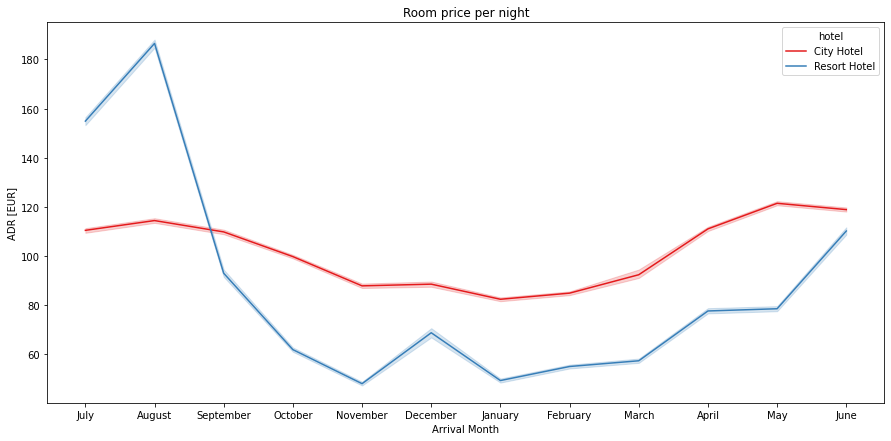

In [335]:
plt.figure(figsize=(15,7))
sns.lineplot(x = "arrival_date_month", y="adr", hue="hotel", data= hotel,
             hue_order = ["City Hotel", "Resort Hotel"],palette= 'Set1')

plt.title("Room price per night")
plt.xlabel("Arrival Month")
plt.ylabel("ADR [EUR]")
plt.show()

2- What is the busiest months? 

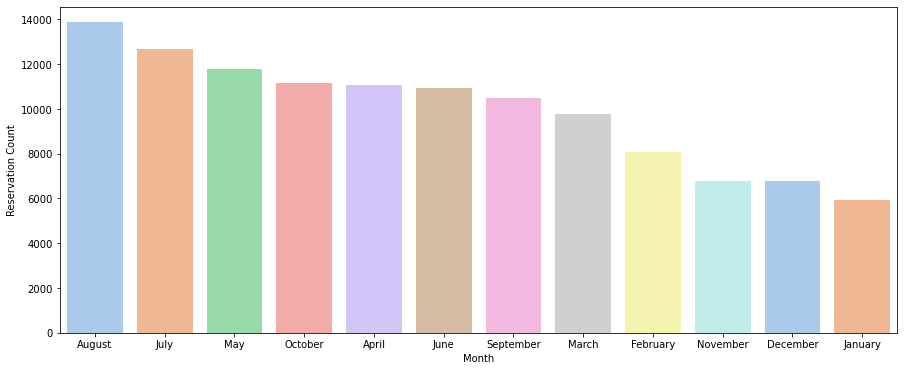

In [336]:
month_sorted = ['January','February','March','April','May','June','July','August','September','October','November','December']

plt.figure(figsize=(15,6))
sns.countplot(data=hotel ,x='arrival_date_month', palette='pastel',
              order=hotel.value_counts(hotel['arrival_date_month']).index)


plt.xlabel('Month')
plt.ylabel('Reservation Count')
plt.show()

3-

#

3- What is the top 10 Countries of Origin of the Guests ?

Text(0, 0.5, 'Reservation Count')

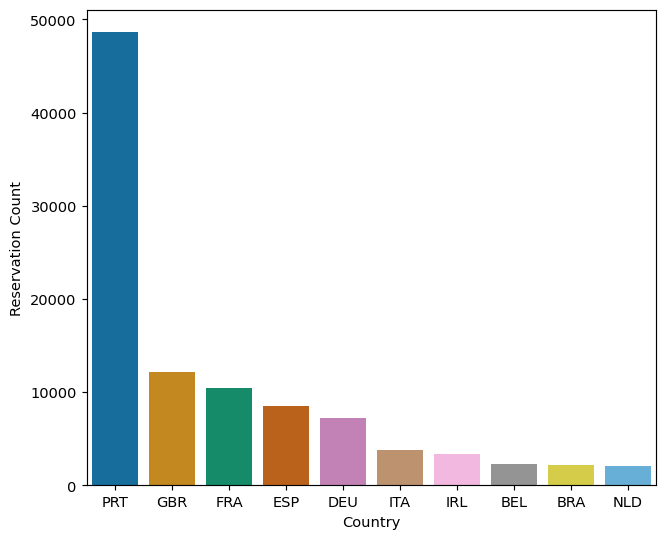

In [337]:
plt.figure(figsize=(7,6), dpi=105)

sns.countplot(data=hotel, x='country',order=pd.value_counts(hotel['country']).iloc[:10].index,
              palette='colorblind')


plt.xlabel('Country')
plt.ylabel('Reservation Count')

4-What is the ercentage of cancelled & Not cancelled bookings.

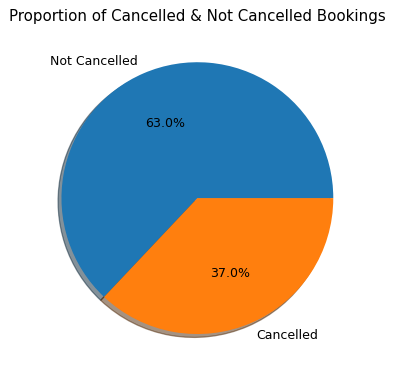

In [338]:
plt.figure(figsize=(7,5), dpi=90)
proportion = hotel['is_canceled'].value_counts()

labels = ['Not Cancelled','Cancelled']
plt.title('Proportion of Cancelled & Not Cancelled Bookings')
plt.pie(proportion, labels=labels, shadow = True, autopct = '%1.1f%%')
plt.show()

5-Who are the People with most children and baby that reserved hotel?

In [339]:
hotel['baby_children'] = hotel.apply(lambda x: x['children'] + x['babies'], axis=1)
hotel.sort_values( by= ['baby_children'], ascending= False)[['name','baby_children']][:10]

,name,baby_children
328,Jamie Ramirez,10
46619,Nicholas Parker,10
78656,Marc Robinson,9
72966,James Black,3
115563,Michael Porter,3
103477,Rebecca Blair,3
115541,Brent Ortega,3
109194,Alejandro James,3
94849,Andrew Bell,3
31863,Molly Torres,3


6-What is the number of Special Requests?

In [340]:
hotel['total_of_special_requests'].value_counts(normalize = True)

0    0.588977
1    0.278298
2    0.108627
3    0.020915
4    0.002848
5    0.000335
Name: total_of_special_requests, dtype: float64

In [341]:
#

Heatmap for the correlations

<AxesSubplot:>

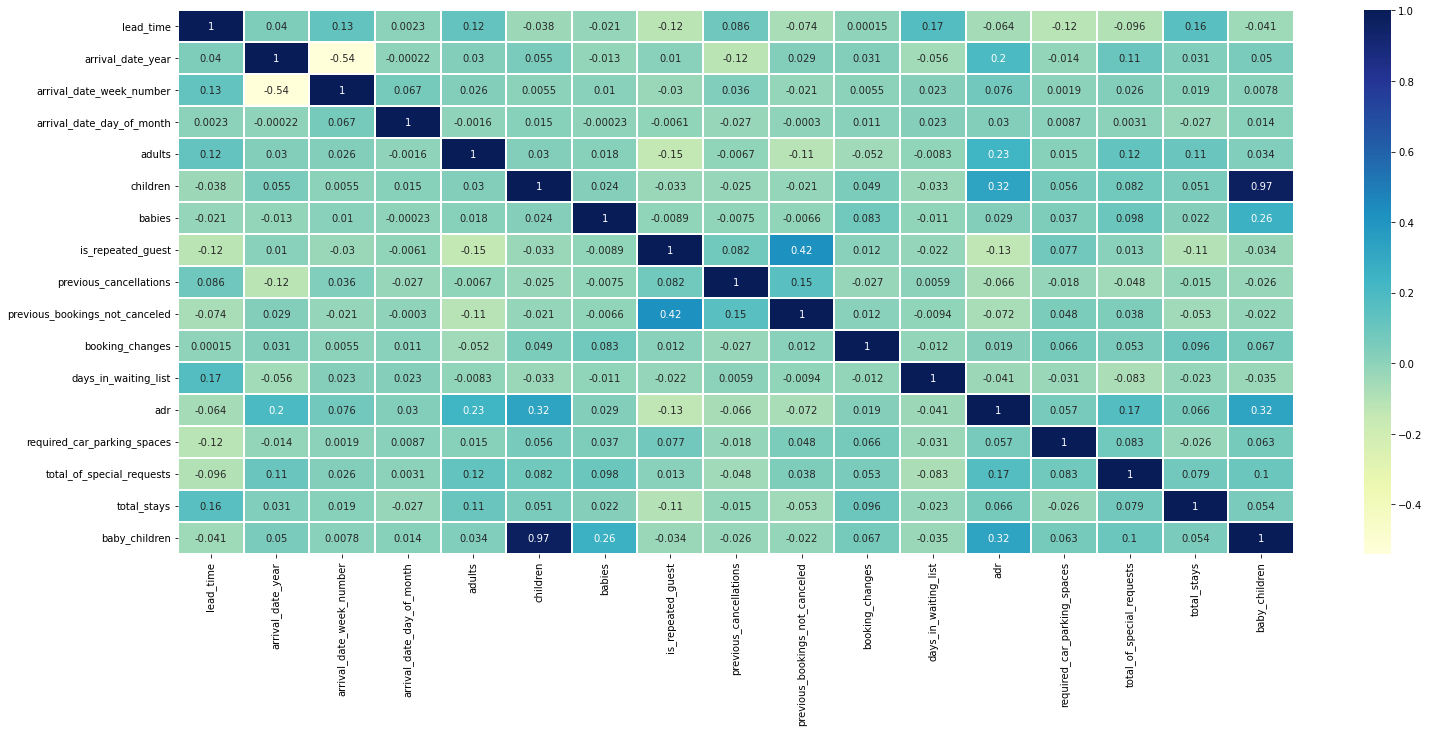

In [342]:
plt.figure(figsize=(25,10))
sns.heatmap(hotel.corr(),annot=True,linewidths=2, cmap = 'YlGnBu')

In [343]:
numerical = hotel.loc[:, (hotel.dtypes == int) | (hotel.dtypes == float)].columns.tolist()
numerical

['lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'total_stays',
 'baby_children']

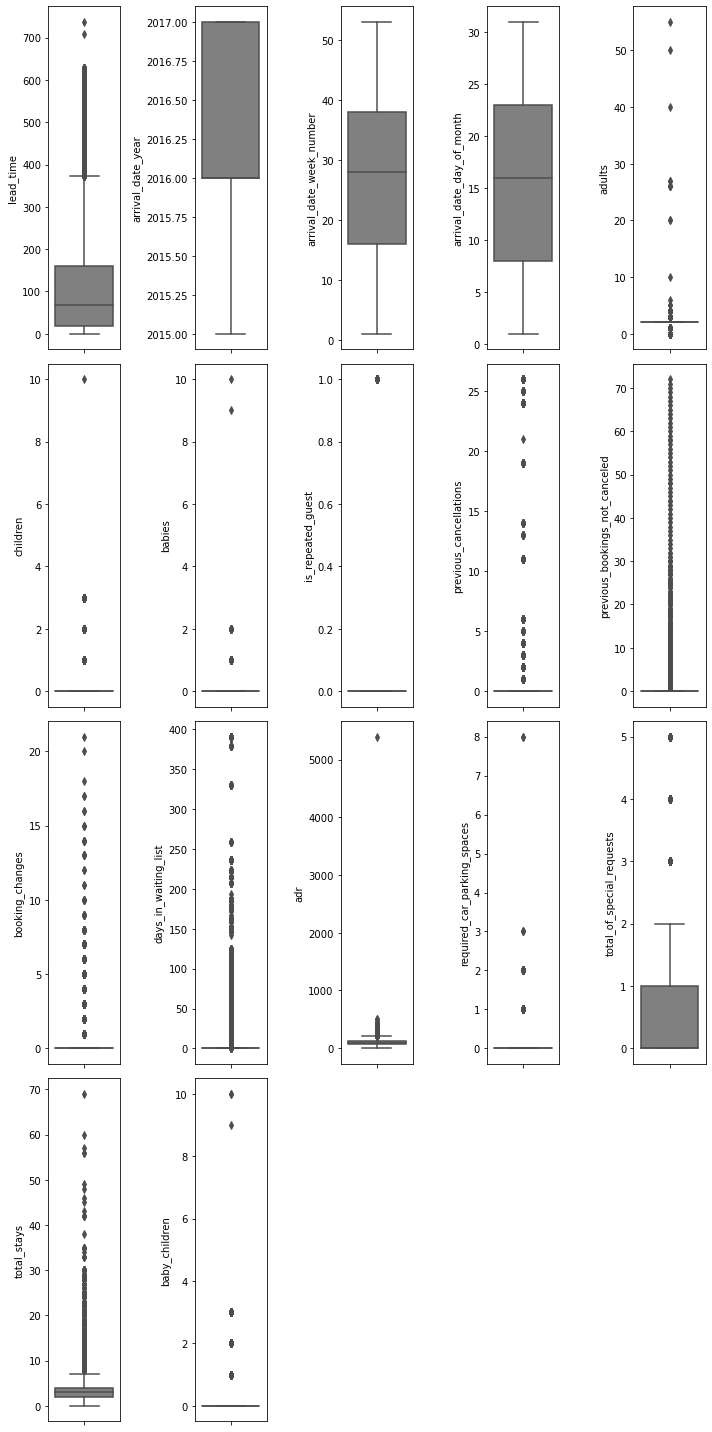

In [344]:
plt.figure(figsize=(10, 20))
for i in range(0, len(numerical)):
    plt.subplot(4, int(len(numerical)/3), i+1)
    sns.boxplot(y=hotel[numerical[i]], color='gray', orient='v')
    plt.tight_layout()

In [345]:
hotel.drop(hotel[hotel['adr'] > 5000].index, inplace = True)

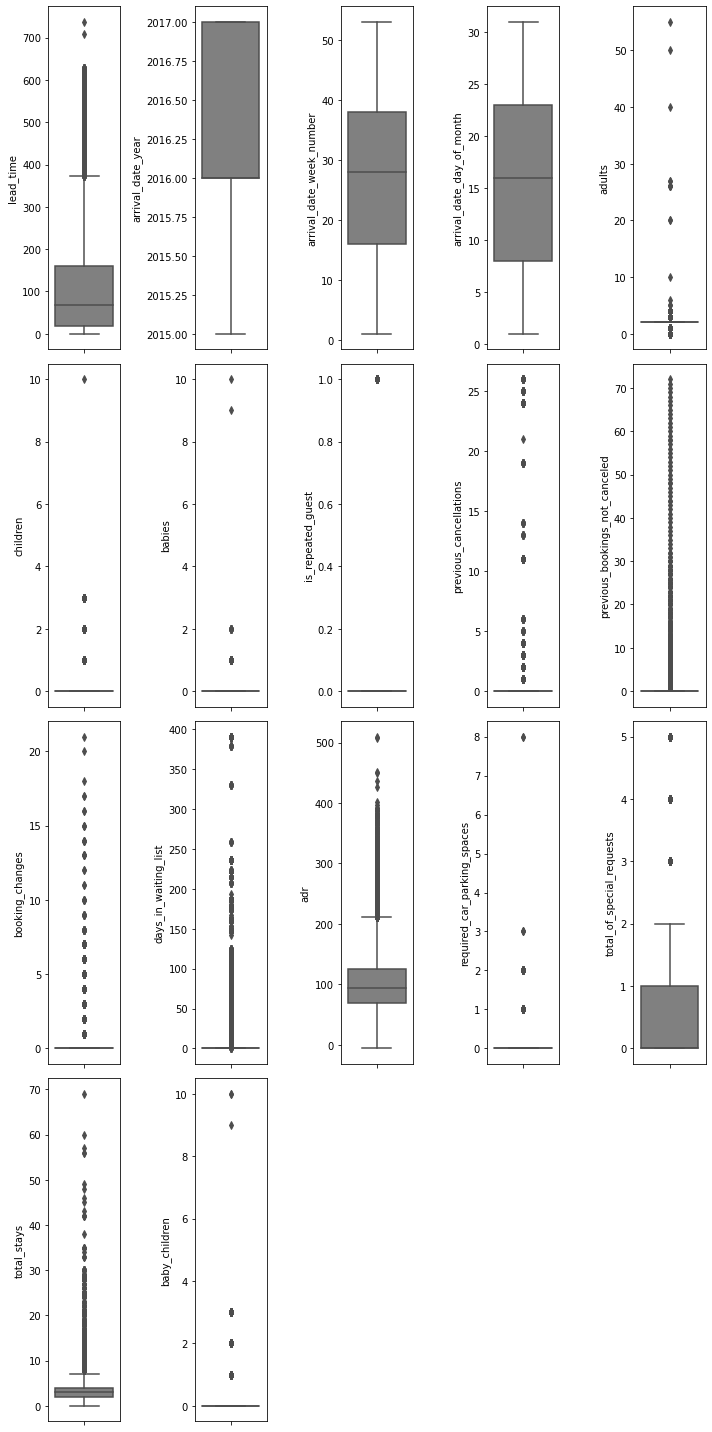

In [346]:
plt.figure(figsize=(10, 20))
for i in range(0, len(numerical)):
    plt.subplot(4, int(len(numerical)/3), i+1)
    sns.boxplot(y=hotel[numerical[i]], color='gray', orient='v')
    plt.tight_layout()

In [347]:
hotel

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,children,babies,...,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,total_stays,baby_children
0,Resort Hotel,0,342,2015,July,27,1,2,0,0,...,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322,0,0
1,Resort Hotel,0,737,2015,July,27,1,2,0,0,...,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157,0,0
2,Resort Hotel,0,7,2015,July,27,1,1,0,0,...,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734,1,0
3,Resort Hotel,0,13,2015,July,27,1,1,0,0,...,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677,1,0
4,Resort Hotel,0,14,2015,July,27,1,2,0,0,...,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,0,0,...,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647,7,0
119386,City Hotel,0,102,2017,August,35,31,3,0,0,...,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333,7,0
119387,City Hotel,0,34,2017,August,35,31,2,0,0,...,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821,7,0
119388,City Hotel,0,109,2017,August,35,31,2,0,0,...,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860,7,0


In [348]:
X = hotel.drop('is_canceled', axis=1)
y = hotel['is_canceled']

In [349]:
X

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,children,babies,meal,...,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,total_stays,baby_children
0,Resort Hotel,342,2015,July,27,1,2,0,0,BB,...,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322,0,0
1,Resort Hotel,737,2015,July,27,1,2,0,0,BB,...,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157,0,0
2,Resort Hotel,7,2015,July,27,1,1,0,0,BB,...,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734,1,0
3,Resort Hotel,13,2015,July,27,1,1,0,0,BB,...,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677,1,0
4,Resort Hotel,14,2015,July,27,1,2,0,0,BB,...,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,23,2017,August,35,30,2,0,0,BB,...,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647,7,0
119386,City Hotel,102,2017,August,35,31,3,0,0,BB,...,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333,7,0
119387,City Hotel,34,2017,August,35,31,2,0,0,BB,...,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821,7,0
119388,City Hotel,109,2017,August,35,31,2,0,0,BB,...,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860,7,0


In [350]:
y

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: is_canceled, Length: 119389, dtype: object

In [351]:
from sklearn.model_selection import train_test_split

In [352]:
X_train, X_test, y_train, y_test = train_test_split(X ,y , test_size=0.2 , random_state=42)

In [353]:
X_train.shape

(95511, 33)

In [354]:
X_test.shape

(23878, 33)

In [355]:
y_train.shape

(95511,)

In [356]:
y_test.shape

(23878,)

In [357]:
model = LogisticRegression (max_iter=5000)

In [358]:
model.fit(X_train,y_train)

ValueError: could not convert string to float: 'City Hotel'

In [359]:
model.predict(X_test)

ValueError: could not convert string to float: 'Resort Hotel'